In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import hamming_loss
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from scipy import interp
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist

Using TensorFlow backend.


# a). Creat training set and test set

In [2]:
from sklearn.model_selection import train_test_split
file = pd.read_csv("Anuran Calls (MFCCs)/Frogs_MFCCs.csv")
x_training, x_test, y_training, y_test = train_test_split(
    file[['MFCCs_ 1','MFCCs_ 2','MFCCs_ 3','MFCCs_ 4',
    'MFCCs_ 5','MFCCs_ 6','MFCCs_ 7','MFCCs_ 8','MFCCs_ 9',
    'MFCCs_10','MFCCs_11','MFCCs_12','MFCCs_13','MFCCs_14',
    'MFCCs_15','MFCCs_16','MFCCs_17','MFCCs_18','MFCCs_19',
    'MFCCs_20','MFCCs_21','MFCCs_22']],
    file[['Family','Genus','Species']],test_size=0.3)

# b(1). Try exact match and hamming score |

In [3]:
clf = svm.SVC(gamma='auto')
model = clf.fit(x_training, y_training[['Family']])
y_pred = model.predict(x_test)
hammingLoss = hamming_loss(y_test[['Family']], y_pred)
print('hamming loss for label(Family) =', hammingLoss)

y_pred_list = y_pred.tolist()
y_training_list = y_training['Family'].values.tolist()
match=0
for i in range(0,len(y_pred_list)):
    if y_pred_list[i] == y_training_list[i]:
        match += 1
exact_match = match/len(y_pred_list)
print('exact match of label(Family) =', exact_match)

hamming loss for label(Family) = 0.07040296433534043
exact match of label(Family) = 0.48355720240852246


In [4]:
clf = svm.SVC(gamma='auto')
model = clf.fit(x_training, y_training[['Genus']])
y_pred = model.predict(x_test)
hammingLoss = hamming_loss(y_test[['Genus']], y_pred)
print('hamming loss for label(Genus) =', hammingLoss)

y_pred_list = y_pred.tolist()
y_training_list = y_training['Genus'].values.tolist()
match=0
for i in range(0,len(y_pred_list)):
    if y_pred_list[i] == y_training_list[i]:
        match += 1
exact_match = match/len(y_pred_list)
print('exact match of label(Genus) =', exact_match)

hamming loss for label(Genus) = 0.09124594719777675
exact match of label(Genus) = 0.42658638258452986


In [5]:
clf = svm.SVC(gamma='auto')
model = clf.fit(x_training, y_training[['Species']])
y_pred = model.predict(x_test)
hammingLoss = hamming_loss(y_test[['Species']], y_pred)
print('hamming loss for label(Species) =', hammingLoss)

y_pred_list = y_pred.tolist()
y_training_list = y_training['Species'].values.tolist()
match=0
for i in range(0,len(y_pred_list)):
    if y_pred_list[i] == y_training_list[i]:
        match += 1
exact_match = match/len(y_pred_list)
print('exact match of label(Species) =', exact_match)

hamming loss for label(Species) = 0.07966651227420102
exact match of label(Species) = 0.30662343677628534


# b(2). Try SVM on Gaussian Kernal, determine weight of svm and width of kernel

In [7]:
gamma_set = np.logspace(-3,6,8)
c_set = np.logspace(-3, 4, 5)
scores_set = {}
for c in c_set:
    for g in gamma_set:
        scv = svm.SVC(C=c,kernel='rbf',gamma=g,decision_function_shape='ovr') 
        scores = cross_val_score(scv, x_training, y=y_training[['Family']],cv=10).mean()
        scores_set["c={},gamma={}".format(c,g)] = scores

In [8]:
print(max(zip(scores_set.keys(), scores_set.values())))

('c=3.1622776601683795,gamma=7.196856730011529', 0.986898369078952)


In [9]:
gamma_set = np.logspace(-3,6,8)
c_set = np.logspace(-3, 4, 5)
scores_set = {}
for c in c_set:
    for g in gamma_set:
        scv = svm.SVC(C=c,kernel='rbf',gamma=g,decision_function_shape='ovr') 
        scores = cross_val_score(scv, x_training, y=y_training[['Genus']],cv=10).mean()
        scores_set["c={},gamma={}".format(c,g)] = scores

In [10]:
print(max(zip(scores_set.keys(), scores_set.values())))

('c=3.1622776601683795,gamma=7.196856730011529', 0.9845145023006439)


In [11]:
gamma_set = np.logspace(-3,6,8)
c_set = np.logspace(-3, 4, 5)
scores_set = {}
for c in c_set:
    for g in gamma_set:
        scv = svm.SVC(C=c,kernel='rbf',gamma=g,decision_function_shape='ovr') 
        scores = cross_val_score(scv, x_training, y=y_training[['Species']],cv=10).mean()
        scores_set["c={},gamma={}".format(c,g)] = scores

In [12]:
print(max(zip(scores_set.keys(), scores_set.values())))

('c=3.1622776601683795,gamma=7.196856730011529', 0.9805416768488702)


# b(3). Use L1 penalty svm, determine weight of svm

In [13]:
c_set = np.logspace(-3, 4, 5)
scores_set = {}
for c in c_set:
    scv = svm.LinearSVC(penalty='l1',C=c,multi_class='ovr',dual=False) 
    scores = cross_val_score(scv, x_training, y=y_training[['Family']],cv=10).mean()
    scores_set["c={}".format(c)] = scores
    
print(max(zip(scores_set.keys(), scores_set.values())))

('c=3.1622776601683795', 0.9344658092250677)


In [14]:
c_set = np.logspace(-3, 4, 5)
scores_set = {}
for c in c_set:
    scv = svm.LinearSVC(penalty='l1',C=c,multi_class='ovr',dual=False) 
    scores = cross_val_score(scv, x_training, y=y_training[['Genus']],cv=10).mean()
    scores_set["c={}".format(c)] = scores

print(max(zip(scores_set.keys(), scores_set.values())))

('c=3.1622776601683795', 0.9453934364121999)


In [15]:
c_set = np.logspace(-3, 4, 5)
scores_set = {}
for c in c_set:
    scv = svm.LinearSVC(penalty='l1',C=c,multi_class='ovr',dual=False) 
    scores = cross_val_score(scv, x_training, y=y_training[['Species']],cv=10).mean()
    scores_set["c={}".format(c)] = scores

print(max(zip(scores_set.keys(), scores_set.values())))

('c=3.1622776601683795', 0.9565075343214524)


# b(4). Use SMOTE to handle imbalance data, then repeat b(3)

In [16]:
sm = SMOTE('minority')
x_training_smote, y_training1_smote = sm.fit_sample(x_training,y_training[['Family']]) 
c_set = np.logspace(-3, 4, 5)
scores_set = {}
for c in c_set:
    scv = svm.LinearSVC(penalty='l1',C=c,multi_class='ovr',dual=False) 
    scores = cross_val_score(scv, x_training_smote, y=y_training1_smote,cv=10).mean()
    scores_set["c={}".format(c)] = scores

print(max(zip(scores_set.keys(), scores_set.values())))

('c=3.1622776601683795', 0.9520508126913659)


In [17]:
x_training_smote, y_training2_smote = sm.fit_sample(x_training,y_training[['Genus']]) 
c_set = np.logspace(-3, 4, 5)
scores_set = {}
for c in c_set:
    scv = svm.LinearSVC(penalty='l1',C=c,multi_class='ovr',dual=False) 
    scores = cross_val_score(scv, x_training_smote, y=y_training2_smote,cv=10).mean()
    scores_set["c={}".format(c)] = scores

print(max(zip(scores_set.keys(), scores_set.values())))

('c=3.1622776601683795', 0.9607111888473797)


In [18]:
x_training_smote, y_training3_smote = sm.fit_sample(x_training,y_training[['Species']]) 
c_set = np.logspace(-3, 4, 5)
scores_set = {}
for c in c_set:
    scv = svm.LinearSVC(penalty='l1',C=c,multi_class='ovr',dual=False) 
    scores = cross_val_score(scv, x_training_smote, y=y_training3_smote,cv=10).mean()
    scores_set["c={}".format(c)] = scores

print(max(zip(scores_set.keys(), scores_set.values())))

('c=3.1622776601683795', 0.9633356645353878)


In [33]:
conclusion = pd.read_csv('conc.csv')
conclusion

,Scores,Gaussian Kernal,L1 penalty,SMOTE
0,Family,0.986898,0.934466,0.952051
1,Genus,0.984515,0.945393,0.960711
2,Species,0.980542,0.956508,0.963336
3,Avg,0.983985,0.945456,0.958699


From the statistic results of the classifiers we trained before, the Gaussian Kernal seems to perform better in overall result.

# b(5). Using Classifier Chain

In [19]:
# using gudie from: https://github.com/mmyd/Machine-Learning-/blob/453936ae725ae704c939f121e1405aa9abf3bda2/hm5_inf552.ipynb
y_training['Family'].replace('Bufonidae',1,inplace=True)
y_training['Family'].replace('Dendrobatidae',2,inplace=True)
y_training['Family'].replace('Hylidae',3,inplace=True)
y_training['Family'].replace('Leptodactylidae',4,inplace=True)
y_training['Genus'].replace('Adenomera',5,inplace=True)
y_training['Genus'].replace('Ameerega',6,inplace=True)
y_training['Genus'].replace('Dendropsophus',7,inplace=True)
y_training['Genus'].replace('Hypsiboas',8,inplace=True)
y_training['Genus'].replace('Leptodactylus',9,inplace=True)
y_training['Genus'].replace('Osteocephalus',10,inplace=True)
y_training['Genus'].replace('Rhinella',11,inplace=True)
y_training['Genus'].replace('Scinax',12,inplace=True)
y_training['Species'].replace('AdenomeraAndre',13,inplace=True)
y_training['Species'].replace('AdenomeraHylaedactylus',14,inplace=True)
y_training['Species'].replace('Ameeregatrivittata',15,inplace=True)
y_training['Species'].replace('HylaMinuta',16,inplace=True)
y_training['Species'].replace('HypsiboasCinerascens',17,inplace=True)
y_training['Species'].replace('HypsiboasCordobae',18,inplace=True)
y_training['Species'].replace('LeptodactylusFuscus',19,inplace=True)
y_training['Species'].replace('OsteocephalusOophagus',20,inplace=True)
y_training['Species'].replace('Rhinellagranulosa',21,inplace=True)
y_training['Species'].replace('ScinaxRuber',22,inplace=True)
x_training_chain = pd.DataFrame(x_training,dtype='float')

y_test['Family'].replace('Bufonidae',1,inplace=True)
y_test['Family'].replace('Dendrobatidae',2,inplace=True)
y_test['Family'].replace('Hylidae',3,inplace=True)
y_test['Family'].replace('Leptodactylidae',4,inplace=True)
y_test['Genus'].replace('Adenomera',5,inplace=True)
y_test['Genus'].replace('Ameerega',6,inplace=True)
y_test['Genus'].replace('Dendropsophus',7,inplace=True)
y_test['Genus'].replace('Hypsiboas',8,inplace=True)
y_test['Genus'].replace('Leptodactylus',9,inplace=True)
y_test['Genus'].replace('Osteocephalus',10,inplace=True)
y_test['Genus'].replace('Rhinella',11,inplace=True)
y_test['Genus'].replace('Scinax',12,inplace=True)
y_test['Species'].replace('AdenomeraAndre',13,inplace=True)
y_test['Species'].replace('AdenomeraHylaedactylus',14,inplace=True)
y_test['Species'].replace('Ameeregatrivittata',15,inplace=True)
y_test['Species'].replace('HylaMinuta',16,inplace=True)
y_test['Species'].replace('HypsiboasCinerascens',17,inplace=True)
y_test['Species'].replace('HypsiboasCordobae',18,inplace=True)
y_test['Species'].replace('LeptodactylusFuscus',19,inplace=True)
y_test['Species'].replace('OsteocephalusOophagus',20,inplace=True)
y_test['Species'].replace('Rhinellagranulosa',21,inplace=True)
y_test['Species'].replace('ScinaxRuber',22,inplace=True)
x_test_chain = pd.DataFrame(x_test,dtype='float')

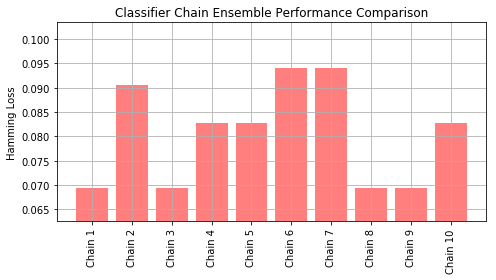

In [20]:
# using guide form: https://scikit-learn.org/stable/auto_examples/multioutput/plot_classifier_chain_yeast.html#sphx-glr-auto-examples-multioutput-plot-classifier-chain-yeast-py
from sklearn.multioutput import ClassifierChain
scv = svm.SVC(kernel='rbf') 
chains = [ClassifierChain(scv, order='random', random_state=i)for i in range(10)]
for chain in chains:
    chain.fit(x_training_chain,np.array(y_training))
Y_pred_chains = np.array([chain.predict(x_test_chain) for chain in chains])
Y_pred_chains
model_scores = [hamming_loss(np.array(y_test).reshape(-1,1), Y_pred_chain.reshape(-1,1))for Y_pred_chain in Y_pred_chains]
model_names = (
               'Chain 1',
               'Chain 2',
               'Chain 3',
               'Chain 4',
               'Chain 5',
               'Chain 6',
               'Chain 7',
               'Chain 8',
               'Chain 9',
               'Chain 10'
               )

x_pos = np.arange(len(model_names))


fig, ax = plt.subplots(figsize=(7, 4))
ax.grid(True)
ax.set_title('Classifier Chain Ensemble Performance Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(model_names, rotation='vertical')
ax.set_ylabel('Hamming Loss')
ax.set_ylim([min(model_scores) * .9, max(model_scores) * 1.1])

ax.bar(x_pos, model_scores, alpha=0.5, color='red')
plt.tight_layout()
plt.show()

# b(6) Confusion matrix, ROC-AUC, precison and recall

Gaussian kernel, Family class

In [21]:
# using guide from: https://scikit-learn.org/stable/auto_examples/model_selection.html
# using guide from: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
scv = OneVsRestClassifier(svm.SVC(C=3.1622776601683795,gamma=7.196856730011529,kernel='linear'))
scv.fit(x_training,y_training[['Family']])
y_pred = scv.predict(x_test)
print('Precision for Gaussian kernel (Family)',precision_score(np.array(y_test[['Family']]),y_pred,average='macro'))
print('Recall for Gaussian kernel (Family)', recall_score(np.array(y_test[['Family']]), y_pred, average='macro')  )
print('---Confusion matrix---')
print(confusion_matrix(np.array(y_test[['Family']]), y_pred))


Precision for Gaussian kernel (Family) 0.693429921308784
Recall for Gaussian kernel (Family) 0.6930964797428167
---Confusion matrix---
[[   0    0   19    0]
 [   0  156   10    8]
 [   0   10  587   54]
 [   1    6   27 1281]]


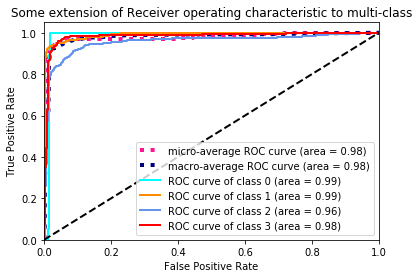

In [22]:
y_training_0 = label_binarize(y_training[['Family']], classes=[1, 2, 3, 4])
y_test_0 = label_binarize(y_test[['Family']], classes=[1, 2, 3, 4])
n_classes = y_training_0.shape[1]

# Add noisy features to make the problem harder
n_samples, n_features = x_training.shape
x_training_0 = np.c_[x_training]
x_test_0 = np.c_[x_test]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(C=3.1622776601683795,gamma=7.196856730011529,kernel='linear'))
y_score = classifier.fit(x_training_0, y_training_0).decision_function(x_test_0)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(y_test_0)[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_0.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

L1 Penalty, Family class

In [23]:
scv = OneVsRestClassifier(svm.LinearSVC(penalty='l1',C=3.1622776601683795,dual=False))
scv.fit(x_training,y_training[['Family']])
y_pred = scv.predict(x_test)
print('Precision for Gaussian kernel (Family)',precision_score(np.array(y_test[['Family']]),y_pred,average='macro'))
print('Recall for Gaussian kernel (Family)', recall_score(np.array(y_test[['Family']]), y_pred, average='macro')  )
print('---Confusion matrix---')
print(confusion_matrix(np.array(y_test[['Family']]), y_pred))

Precision for Gaussian kernel (Family) 0.6942850408405632
Recall for Gaussian kernel (Family) 0.6907214435658587
---Confusion matrix---
[[   0    0   19    0]
 [   0  153   14    7]
 [   0    6  596   49]
 [   0    7   35 1273]]


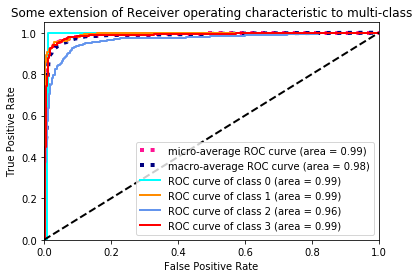

In [24]:
y_training_0 = label_binarize(y_training[['Family']], classes=[1, 2, 3, 4])
y_test_0 = label_binarize(y_test[['Family']], classes=[1, 2, 3, 4])
n_classes = y_training_0.shape[1]

# Add noisy features to make the problem harder
n_samples, n_features = x_training.shape
x_training_0 = np.c_[x_training]
x_test_0 = np.c_[x_test]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.LinearSVC(penalty='l1',C=3.1622776601683795,dual=False))
y_score = classifier.fit(x_training_0, y_training_0).decision_function(x_test_0)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(y_test_0)[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_0.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])



all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

SVC with SMOTE data, Family class

In [25]:
sm = SMOTE('minority')
x_training_smote, y_training1_smote = sm.fit_sample(x_training,y_training[['Family']]) 
scv = OneVsRestClassifier(svm.LinearSVC(penalty='l1',C=3.1622776601683795,dual=False))
scv.fit(x_training_smote, y_training1_smote)
y_pred = scv.predict(x_test)
print('Precision for Gaussian kernel (Family)',precision_score(np.array(y_test[['Family']]),y_pred,average='macro'))
print('Recall for Gaussian kernel (Family)', recall_score(np.array(y_test[['Family']]), y_pred, average='macro')  )
print('---Confusion matrix---')
print(confusion_matrix(np.array(y_test[['Family']]), y_pred))

Precision for Gaussian kernel (Family) 0.7567670413437989
Recall for Gaussian kernel (Family) 0.9205148678486186
---Confusion matrix---
[[  19    0    0    0]
 [   6  148   14    6]
 [  29   12  571   39]
 [  28    5   27 1255]]


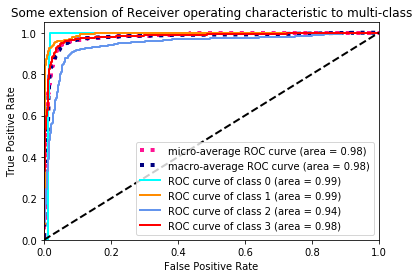

In [26]:
y_training_0 = label_binarize(y_training1_smote, classes=[1, 2, 3, 4])
y_test_0 = label_binarize(y_test[['Family']], classes=[1, 2, 3, 4])
n_classes = y_training_0.shape[1]

# Add noisy features to make the problem harder
n_samples, n_features = x_training_smote.shape
x_training_0 = np.c_[x_training_smote]
x_test_0 = np.c_[x_test]

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.LinearSVC(penalty='l1',C=3.1622776601683795,dual=False))
y_score = classifier.fit(x_training_0, y_training_0).decision_function(x_test_0)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(y_test_0)[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_0.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])



all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# PART II: K-means cluster
# a. Find the best K for this problem

In [27]:
x_data=pd.DataFrame(file.iloc[:,:-4])
K = np.arange(2,51,1)
for k in K:
    cluster= KMeans(n_clusters = k, random_state=42)
    s_score=silhouette_score(x_data, cluster.fit_predict(x_data), metric='euclidean', sample_size=None,
                     random_state=42)
    print(k,s_score)

2 0.3486778410277152
3 0.36768245219926315
4 0.3787509343305295
5 0.371653028394425
6 0.264008021116715
7 0.2606084479447015
8 0.27012114209263827
9 0.27613920292276756
10 0.2636301532112666
11 0.26823331611369794
12 0.27293778510110567
13 0.2747802751701514
14 0.26590996289222385
15 0.2712390811480894
16 0.27331901180941814
17 0.2814394339218013
18 0.27722113812451793
19 0.2815621209599786
20 0.2700513568695653
21 0.26216160444988035
22 0.2717289873840013
23 0.2710113574002109
24 0.27359789334777374
25 0.27014179802098387
26 0.2702449183663071
27 0.2646739468800842
28 0.2636452431136611
29 0.27113535284894485
30 0.263853826117796
31 0.265329414156277
32 0.26624544852835536
33 0.24364416492362267
34 0.26358881064484546
35 0.24370250368576976
36 0.22377681133141492
37 0.264538758059868
38 0.2577772733615752
39 0.26956858482619145
40 0.2199912687516744
41 0.2412036514116309
42 0.2275199385047773
43 0.25727859683951904
44 0.24393282658749524
45 0.23201115936016228
46 0.24007783182954498
4

The best K in this case is K=4

# b. Calculate the majority of each class

In [28]:
cluster=KMeans(n_clusters=4,random_state=42)
cluster.fit(x_data)
label = pd.DataFrame(cluster.labels_)
labels = pd.concat([label,file.iloc[:,-4]],axis=1)
print(pd.pivot_table(labels, index =file.iloc[:,-4],columns=label,aggfunc=len))

                 Family                      
0                     0       1      2      3
Family                                       
Bufonidae           NaN    66.0    2.0    NaN
Dendrobatidae       NaN    42.0    NaN  500.0
Hylidae           101.0  1245.0  590.0  229.0
Leptodactylidae  3467.0   629.0   22.0  302.0


In [29]:
cluster=KMeans(n_clusters=4,random_state=42)
cluster.fit(x_data)
label = pd.DataFrame(cluster.labels_)
labels = pd.concat([label,file.iloc[:,-3]],axis=1)
print(pd.pivot_table(labels, index =file.iloc[:,-3],columns=label,aggfunc=len))

                Genus                      
0                   0       1      2      3
Genus                                      
Adenomera      3466.0   376.0   12.0  296.0
Ameerega          NaN    42.0    NaN  500.0
Dendropsophus    86.0    35.0    NaN  189.0
Hypsiboas        12.0  1038.0  542.0    1.0
Leptodactylus     1.0   253.0   10.0    6.0
Osteocephalus     NaN    76.0   38.0    NaN
Rhinella          NaN    66.0    2.0    NaN
Scinax            3.0    96.0   10.0   39.0


In [30]:
cluster=KMeans(n_clusters=4,random_state=42)
cluster.fit(x_data)
label = pd.DataFrame(cluster.labels_)
labels = pd.concat([label,file.iloc[:,-2]],axis=1)
print(pd.pivot_table(labels, index =file.iloc[:,-2],columns=label,aggfunc=len))

                       Species                      
0                            0       1      2      3
Species                                             
AdenomeraAndre             NaN   370.0    6.0  296.0
AdenomeraHylaedactylus  3466.0     6.0    6.0    NaN
Ameeregatrivittata         NaN    42.0    NaN  500.0
HylaMinuta                86.0    35.0    NaN  189.0
HypsiboasCinerascens       NaN    20.0  452.0    NaN
HypsiboasCordobae         12.0  1018.0   90.0    1.0
LeptodactylusFuscus        1.0   253.0   10.0    6.0
OsteocephalusOophagus      NaN    76.0   38.0    NaN
Rhinellagranulosa          NaN    66.0    2.0    NaN
ScinaxRuber                3.0    96.0   10.0   39.0


From the 3 tables above, we can find out the following majority sets:

cluster_set_1=['Hylidae','Hypsiboas','HypsiboasCordobae']

cluster_set_0=['Leptodactylidae','Adenomera','AdenomeraHylaedactylus']

cluster_set_2=['Hylidae','Hypsiboas','HypsiboasCinerascens']

cluster_set_3=['Dendrobatidae','Ameerega','Ameeregatrivittata']

# c. Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters

I didn't find articles talked about hamming score, but some of the people online think this equals to 1-hamming loss

In [31]:
y_true = np.array(file.iloc[:,-4:-1])
y_pred = []
cluster_set_1=['Hylidae','Hypsiboas','HypsiboasCordobae']
cluster_set_0=['Leptodactylidae','Adenomera','AdenomeraHylaedactylus']
cluster_set_2=['Hylidae','Hypsiboas','HypsiboasCinerascens']
cluster_set_3=['Dendrobatidae','Ameerega','Ameeregatrivittata']
for i in cluster.labels_:
    if i == 0:
        y_pred.append(cluster_set_0)
    elif i == 1:
        y_pred.append(cluster_set_1)
    elif i == 2:
        y_pred.append(cluster_set_2)
    elif i == 3:
        y_pred.append(cluster_set_3)

h_loss = []
for i in range(len(y_true)):
    h_loss.append(hamming_loss(y_true[i], y_pred[i]))
print('avg hamming loss is',sum(h_loss)/len(h_loss))
print('avg hamming score is', 1-sum(h_loss)/len(h_loss))

avg hamming loss is 0.2224229789205477
avg hamming score is 0.7775770210794524


The hamming distance is like forllowing:

In [32]:
x_data=pd.DataFrame(file.iloc[:,:-4])
N = np.arange(1,50,1)
K = np.arange(2,8,1)
y_true = np.array(file.iloc[:,-4:-1])
h_dis = []
for n in N:
    s_score_set = {}
    for k in K:
        cluster=KMeans(n_clusters=k,random_state=42+n)
        s_score=silhouette_score(x_data, cluster.fit_predict(x_data), metric='euclidean', sample_size=None)
        s_score_set[k] = s_score
        best_k = max(s_score_set.keys(),key=(lambda x:s_score_set[x]))
    
    cluster = KMeans(n_clusters=best_k,random_state=42+n)
    cluster.fit(x_data)
    h_dis.append(sum(np.min(cdist(x_data, cluster.cluster_centers_, 'euclidean'),axis=1))/x_data.shape[0])

    
avg_h_dis=sum(h_dis)/len(h_dis)
std_h_dis=np.std(h_dis)
print('avg hamming distance for 50 times is',avg_h_dis)
print('std hamming distance for 50 times is',std_h_dis)

avg hamming distance for 50 times is 0.44826190418413486
std hamming distance for 50 times is 0.005058985152552419


# ISLR 10.7.2

![](./1.jpg)